# Ch1.Introduction to Causal Inferece
1장에서는 인과추론(causal inference)의 기본 개념과 사례를 다루고 기본적인 용어들을 배운다.

---

## 1.1 인과추론의 개념
기초 통계학 강의를 수강하면, 상관관계(Correlation)는 인과관계(Causation)가 아니라는 말을 자주 듣게 된다. 이 두 개념을 혼동하면, **통알못** 취급을 받게 된다. 그런데 정작 우리는 인과관계란 무엇인가에 대해 명확하게 배우지 않았다.  
<p style="text-align: center;">
<i><b>통계학 수업에서 학생들은 '상관관계는 인과관계가 아니다'라고 배우게 된다. 불행히도, 통계학에서 상관관계는 인과관계가 아니라고 하면서 막상 인과관계가 무엇인지는 말해주지 않는다.</b></i>
</p>
<p style="text-align: center;">
<i><b>Judea Pearl</b></i>
</p>

**상관관계**는 두 개의 수치나 확률변수(Random Variable)가 같이 움직이는 관계를 말하며, **인과관계**는 변수의 변화가 다른 변수의 변화를 일으키는 관계를 말한다. 이 둘은 통계학에선 동일시하면 안되는 존재이다.  
많은 주식 투자자들이 자신의 직관이 뷸규칙적인 주가의 움직임과 인과적으로 연결되어 있다고 생각하고 그에 속아 많은 돈을 잃게 된다. 하지만 중요한 점은 **상관관계가 인과관계가 되는 경우가 존재**한다는 것이다.  
인과추론은 **상관관계로부터 인과관계를 추론하고 언제,그리고 왜 서로 다른지 이해하는 과학이다.**

---

## 1.2 인과추론의 목적
옛날부터 인간은 **왜?** 라는 질문을 해왔다. 인과추론의 유일한 목적은 현실을 이해하는 것이다. 하지만 여기에는 의사결정의 기준을 제시하는 것과 같은 규범적(normative) 요소가 자주 포함된다. 일반적으로 **원인과 결과의 관계를 알아야만 원인에 개입하여 원하는 결과를 가져올 수 있다.** 이렇게 인과추론을 산업에 적용하면 대부분 의사결정 과학의 한 분야가 되며, **개입(Intervention)** 의 영향을 이해하는게 중요하다.

---

## 1.3 머신러닝과 인과추론
인과추론으로 답을 얻으려는 질문의 유형을 살펴보면 대부분 **'만약'(What if) 와 같은 반사실적(CounterFactual)** 인 유형인 것을 알 수 있다. 머신러닝은 이러한 유형의 질문에는 취약하다. 머신러닝은 변수 간의 상관관계를 이용해서 변수들을 다른 변수에서 예측을 진행하며 예측에 사용하는 변수를 변경하지 않는 이상 머신러닝은 잘 작동하지만 **개입**이 동반되는 대부분의 의사결정에서 예측 모델로 목적을 달성하는 것은 매우 어려운 일이다. 하지만 머신러닝을 단순한 예측 도구가 아닌 강력한 모델의 도구 상자라는 각도에서 접근하면, 인과추론의 목표에 어떻게 머신러닝이 연결되는지 이해할 수 있을 것이다. 추후 머신러닝과 인과추론을 함께 사용할 때 주의사항과 머신러닝 알고리즘이 어떻게 인과추론에 활용될 수 있는지 배운다.

---

## 1.4 상관관계와 인과관계

상관관계가 인과관계를 의미하지 않는다는 것은 직관적으로 이해할 수 있다. 예시로 온라인 커머스 기업을 운영한다고 가정해보자. 중소기업들은 온라인 플랫폼을 활용하여 제품을 광고하고 판매한다. 만약 가격할인이 판매량에 미치는 영향을 파악하고자 한다. 더 많이 판매해 얻는 이익이 더 저렴하게 얻는 손실을 상쇄할 때, 가격을 할인하면 좋다는 의사결정을 할 수 있다. 이는 **인과관계**에 관한 문제이다. 여러 어린이 장난감 기업의 데이터를 활용해서 할인이 좋은 의사결정인지 판단해본다.

In [33]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
import pandas as pd

url = "https://raw.githubusercontent.com/matheusfacure/causal-inference-in-python-code/main/causal-inference-in-python/data/xmas_sales.csv"
data = pd.read_csv(url)

data.head()

,store,weeks_to_xmas,avg_week_sales,is_on_sale,weekly_amount_sold
0,1,3,12.98,1,219.60
1,1,2,12.98,1,184.70
2,1,1,12.98,1,145.75
3,1,0,12.98,0,102.45
4,2,3,19.92,0,103.22


- `store` : 상점의 ID
- `weeks_to_xms` : 크리스마스까지 남은 기간(주)
- `avg_week_sales` : 12월 각 상점의 주간 판매량
- `is_on_sale` : 해당 주간 기업의 가격할인 진행 여부 (진행:1, 미진행:0)

<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 분석단위</strong><br>
    인과추론 연구에서 분석단위(unit of analysis)는 일반적으로 개입(처치)하려는 대상이다. 새로운 제품이 유저 잔존(User retention)에 미치는 영향을 분석할 때처럼, 분석단위는 대부분 사람이다.하지만 다른 유형의 분석단위를 사용하기도 하며 이번 예시에서 분석단위는 기업이다.
</div>

### 처치와 결과
이제 장난감 할인 데이터와 함께 첫 번째 기술적인 내용을 살펴본다. $T_{i}$는 실험 대상 $i$의 처치 여부를 나타낸다. 여기서 **처치(Treatment)** 란 구하려는 효과에 대한 개입을 나타낸다. 해당 예시에서 처치는 가격 할인이다.

$$
T_i = 
\begin{cases} 
1 & \text{실험대상} i \text{가 처치 받은 경우} \\ 
0 & \text{실험대상} i \text{가 처치 받지 않은 경우}
\end{cases}
$$

필자가 영향을 주려는 변수인 주간 판매량은 **결과(outcome)** 라고 부른다. 또한 실험 대상 $i$의 결과는 $Y_{i}$로 표기한다. '처치'와 '결과'라는 두 개념을 사용하여 인과추론의 목표를 재정의하면, **$T$(처치)가 $Y$(결과)에 미치는 영향을 학습하는 과정이라고 볼 수 있다.** 위의 사례에서는 할인 여부가 주간 판매량에 미치는 효과를 파악하는 것이다.  
<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 처치 표기법</strong><br>
    이 책의 후반부나 다른 자료에서는 종종 처치를 T 대신 D로 표기하는데 D는 인과적인 문제에 시간 차원이 포함되었을 때 혼동을 피하려고 사용하는 표기법이다.<br>
</div>


### 인과추론의 근본적인 문제

인과추론의 근본적인 문제는 **동일한 실험 대상이 처치를 받은 상태와 받지 않은 상태를 동시에 관측할 수 없다는 점이다.** 예제로 돌아가서 처치에 따른 결과를 그래프로 그려본다.

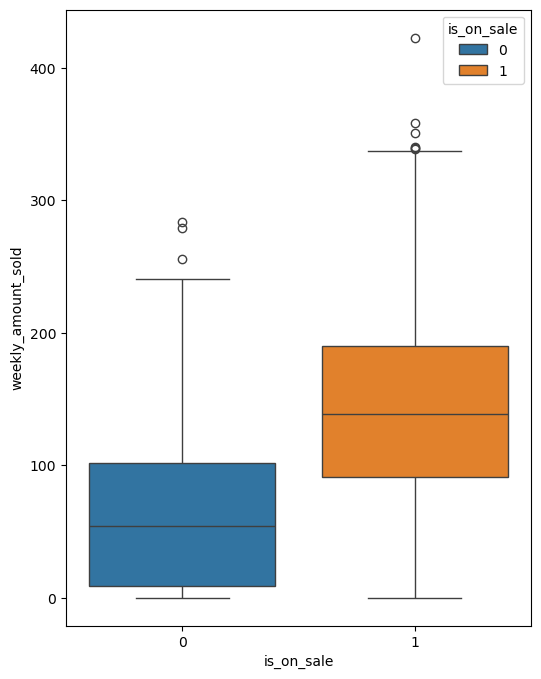

In [15]:
plt.figure(figsize=(6,8))
sns.boxplot(x="is_on_sale", y="weekly_amount_sold",hue='is_on_sale', data = data)
plt.show()

할인을 해서 가격이 낮아지면 사람들은 더 많이 구매하게 된다. 인과추론은 도메인 지식과 밀접한 관련이 있다. 상품을 할인하고 광고를 노출하면 고객들은 더 많이 구하게 된다. 하지만 이토록 판매율이 급증하는 부분이 있다면 도메인 지식을 바탕으로 주의를 기울여야 한다. 위의 그래프를 보면 할인할 때 판매량은 평균적으로 약 150 정도 더 높아지며, 할인하지 않을 떄 판매량이 0~50 정도임을 고려한다면, 이는 비정상적으로 높은 수치일수도 있다.  
이는 상관관계를 인과관계로 착각하고 있음을 알 수 있다. 판매량이 많게 나타난 이유는 상품을 가장 많이 판매하는 대기업들이 더 공격적으로 가격을 낮출 여유가 있기 때문이거나, 고객들이 가장 많이 구매하는 시기인 크리스마스쯤 할인을 진행한 영향일 수도 있다.  
여기서 중요한 점은, 동일한 회사(실험대상)에서 할인이 진행되는 상황과 그렇지 않은 상황을 **동시에 관측할 수 있어야만** 가격할인이 판매량에 미치는 실제 효과를 확신할 수 있다는 점이다. 이러한 두 가지 **반사실적(Counterfactual)** 상황을 비교함으로써 가격할인 효과를 파악할 수 있지만, 동일 대상의 두 상황을 우리는 동시에 관측할 수 없으므로 다른 방법을 찾아야 한다.

### 인과모델

이제 인과관계에 대한 Notation을 설명한다.

**인과모델**은 화살표(←)로 표시하는 일련의 할당 메커니즘이다. 이 매커니즘은 $u$를 사용해 모델 외부의 변수를 나타내며 변수 $u$가 어떻게 생성되었는지 따로 설명하지 않는다. 변수 $u$ 외 다른 모든 변수는 중요하므로 모델에 포함한다.  
다음으로, 한 변수를 다른 변수에 매핑하는 함수 $f$가 있다. 다음 인과모델을 예시로 든다.
$$
T ← f_{t}(u_{t})
$$
$$
Y ← f_{y}(T,u_{y})
$$


첫 번째 식에서 모델링하지 않는 변수 집합 $u_{t}$(**외부변수**)가 함수 $f_{t}$를 통해 처치변수 $T$를 유발하는 원인이 된다. 두 번째 식에서 처치변수 $T$는 다른 변수 집합 $u_{y}$(마찬가지로 모델링하지 않는 변수)와 함께 함수 $f_{y}$를 통해 결과 $Y$를 유발한다. 해당 수식에서 $u_{y}$는 결과가 단순히 처치 변수만으로 결정되지 않음을 나타낸다. 즉, **모델링하지 않기로 선택한 변수라 하더라도 결과에 영향을 미친다.**  
가격할인 예시에 적용하면, 주간 판매량은 처치에 해당하는 할인 여부 및 특정되지 않은 요인들인 $u$ 때문에 발생한다. 변수 $u$의 목적은 **모델에 포함된 변수로는 아직 설명되지 않는 변수들의 모든 변동을 설명**하는 것이다. 이러한 변수는 **내생변수**라고도 한다.  
해당 예시에서는 가격할인이 모델 내에 없는 요인들(기업 규모 등) 때문에 유발된다고 볼 수 있다.

$$
IsOnSales ← f_{t}(u_{t})
$$
$$
AmountSold ← f_{y}(IsOnSales,u_{y})
$$

등호 (=) 대신 화살표를 사용하여 인과관계의 **비가역성(Non-reversibility)** 를 분명하게 표시했다. 전통적인 대수학(Algebra)와 달리, 원인과 효과의 비가역성 때문에 인과모델을 다룰 때는 등호 주변으로 간단하게 변수를 옮길 수 없다는 점을 기억하자.  
더 많은 변수를 사용해서 모델링하려면 $u$에서 변수를 꺼내서 명시적으로 인과모델에 포함시키면 된다. 이로써 해당 변수들을 모델 안에서 설명할 수 있게 된다. 가격할인 예시에서, 할인하는 경우와 할인하지 않는 경우의 차이가 큰 이유는 대기업들이 더 공격적으로 할인을 진행할 수 있기 때문일 수 있다고 언급했다.  
이전 모델에는 $BusinessSize$가 포함되지 않았고, 해당 변수는 다른 변수들과 함께 $u$에 포함되어 있다. 하지만 해당 변수를 포함해 다음과 같이 모델링할 수 있다.

$$
BusinessSize ← f_{s}(u_{s})
$$
$$
IsOnSales ← f_{t}(BusinessSize,u_{t})
$$
$$
AmountSold ← f_{y}(IsOnSales,BusinessSize,u_{y})
$$

추가 내생변수($BusinessSize$)를 포함하기 위해, 먼저 해당 변수가 어떻게 생성되었는지 나타내는 수식을 추가하도록 한다. 그 다음  $BusinessSize$를 모델 외부변수로 다루지 않도록 $u_t$에서 제외한다. 두 번째 수식은 $IsOnSales$의 원인이 $BusinessSize$를 식에 추가해볼 수 있다. 이는 대기업들이 더 많이 판매한다는 생각을 표현한 식이다. 정리하자면, $BusinessSize$는 처치($IsOnSales$)와 결과($AmountSold$) 모두의 공통 원인이 된다.  
다음과 같이 통계학과 익숙한 방식과 연결해보자.

$$
AmountSold_i=\beta_0+\beta_1IsOnSales_i+\beta_2BusinessSize_i+e_i
$$

언뜻 보면 다르지만, 자세히 살펴보면 우리의 인과모델과 매우 비슷한 것을 알 수 있다.  
1. 이전 모델에서의 마지막 수식에서 $f_y$함수를 어떻게 대체하는지 살펴보면, 내생변수 $IsOnSales$와 $BusinessSize$가 선형적으로 결합한 결과로 $AmountSold$를 만드는 것을 알 수 있다. 즉, 해당 선형 회귀모형은 이전 모델보다 더 많은 가정을 하며, 변수 간의 관계에 함수 형태(여기서는 선형)을 부여한다고 볼 수 있다.  

2. 독립(내생)변수인 $IsOnSales$와 $BusinessSize$가 어떻게 생성되는지 나타내지 않는다.  

3. 선형회귀모형은 할당 연산자(←) 대신 등호(=)를 사용한다. (하지만 두 표기법을 번갈아가며 사용한다.)

<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 외생변수와 내생변수</strong><br>
    원서에서는 외부변수를 <b>외생변수(Exogenous variable)</b>라고 표현했으나, <b>외생변수와 내생변수</b>라는 용어는 통계/계량경제학에서 다른 의미로 사용된다.<br>
    - <b>외생변수</b> : 관측되지 않은 (시스템 내에 포함되지 않은) 어떠한 다른 변수에도 영향을 받지 않는 변수. 즉, 인과모델 내에서 명시적으로 고려하는 변수라 하더라도, 관측되지 않은 다른 변수에 영향을 받지 않는 변수를 의미한다. <br><br>
    - <b>내생변수</b> : 통계학에서 내생변수는 관측되지 않은 (시스템 내에 포함되지 않은) 요인에 의해 영향을 받는 변수를 의미한다. 가격할인 예시에서는 IsOnSales가 내생변수이다. 또한 관측되지 않은 요인(u)에 의해 영향을 받기 때문에 BusinessSize도 내생변수라고 할 수 있다.
</div>

### 1.4.4 개입
인과모델이 있다면 해당 모델을 고치고 개선해서 인과적 질문의 답을 찾을 수 있다. 이를 공식 용어로 **개입(Intervention)** 이라고 부른다. 예를 들어, 아주 간단한 인과모델을 사용해서 모든 실험 대상이 처치 $t_{0}$를 받도록 하는 상황을 가정해보자. 이렇게 하면 $T$에 대한 자연적 원인을 제거하므로 상수로 대체할 수 있다.
$$
T ← t_{0}
$$
$$
Y ← f_{y}(T,u_{y})
$$
이는 **'처치 $t_{0}$로 설정한다면 결과 $Y$에 어떤 일이 일어날까'** 라는 질문에 답하는 사고 실험이다. 실제로 처치에 개입할 필요는 없다(개입할 수 있지만, 나중에 다룬다). 인과추론에서 개입을 $do(.)$ 연산자를 활용해서 나타낼 수 있다. $T$에 개입해서 어떤 일이 일어날지를 추론하고 싶다면 $do(T=t_{0})$로 표현할 수 있다. $do(.)$ 연산자는 개입을 표현하며, 주어진 현상을 그대로 관측하는 것이 아닌 개입(doing)한다는 의미로 이해할 수 있다.  
$do(.)$ 연산자를 통해 상관관계와 인과관계가 다른 이유를 한눈에 알 수 있다. 예시에서 가격 할인을 한 회사의 판매량의 기댓값 $E[AmountSold |IsOnSales =1]$이 높으면, 가격을 할인하도록 개입한 경우의 판매량 기댓값 $E[AmountSold |do(IsOnSales =1)]$이 과대 추정될 수 있다고 위에서 언급했다. 이때 첫 번째 경우처럼 가격을 할인하기로 결정한 회사는 대기업일 확률이 높다. 반면 $E[AmountSold |do(IsOnSales =1)]$은 모든 회사가 가격을 할인하도록 통제했을 때 어떤 일이 발생했을지를 나타낸다.  
중요한 것은 일반적으로 다음 식과 같이 가격을 할인한 회사의 판매량에 대한 조건부 기댓값과, 할인하도록 통제한 회사의 판매량에 대한 조건부 기댓값은 **다르다는 점이다.**
$$
E[\ AmountSold\ |\ IsOnSales =1\ ] \neq E[\ AmountSold\ |\ do(IsOnSales =1)\ ]
$$

선택(selection)과 개입의 관점에서 이 두 개념의 차이를 살펴보자. 선택 측면에서 할인이 조건으로 주어질 때는 실제로 가격을 할인하기로 선택한 회사들의 하위 표본 판매량을 측정한다. 반면 $do(IsOnSales)$ 개입이 조건으로 주어질 때는 모든 회사가 가격을 할인하도록 통제한 다음에 전체 표본에서 판매량을 측정한다.
<center>

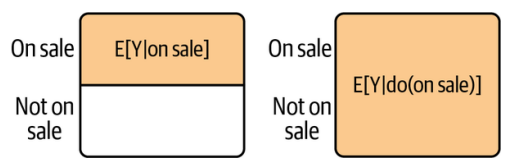
<p style= font-style:italic;">선택은 처치에 따라 표본을 필터링하고, 개입은 전체 표본의 처치 여부를 통제한다.</p>

</center>

$do(.)$연산자는 관측된 데이터에서 항상 얻을 수 없는 인과 추정량(Causal estimand)을 정의하는데 사용한다. 예제에서는 모든 기업이 가격을 할인하도록 강제하지 않았으므로, 모든 회사의 $do(IsOnSales=1)$인 상황을 관측할 수 없다. 즉, $do(.)$ 연산자는 구하려는 인과 추정량을 분명하게 표현하는데 사용할 수 있는 이론적 개념으로 매우 유용하다. 대부분의 인과추론은 인과 추정량에 대한 이론적 표현에서 직접 관측할 수 없는 부분을 제거하기 위한 일련의 과정으로 이를 **식별(identification)** 이라고 부른다.

### 개별 처치효과
$do(.)$ 연산자를 사용하면 개별 실험 대상 $i$에 처치가 결과에 미치는 영향인 **개별 처치효과(Individual Treatment Effect,ITE)** 를 표현할 수 있다. 다음 식과 같이 두 개입의 차이로 나타낼 수 있다.
$$
\tau_{i} = Y_{i}|do(T=t_{1})\ -\ Y_{i}|do(T=t_{0})
$$
즉, 각 실험 대상 $i$에 대한 처치가 $t_{0}$에서 $t_{1}$로 바뀔 때의 효과 $\tau_{i}$는 $t_{0}$와 비교하여 $t_{1}$ 하에서의 결과 차이를 나타낸다. 이를 사용하여 판매량에서 세일실행 여부를 0(No)에서 1(Yes)로 바꿀 때의 효과도 추론할 수 있다.
$$
\tau_{i} = AmountSold_{i}|do(IsOnSales=1)\ -\ AmountSold_{i}|do(IsOnSales=0)
$$
인과추론의 근본적인 문제 때문에 앞의 식 중 한 가지 항에 대해서만 관측할 수 있다. 따라서 이론적으로 해당 식을 표현할 수 있다고 해도, 반드시 데이터에서 이를 찾을 수 있다는 뜻은 아니다.

### 잠재적 결과
$do(.)$ 연산자와 함께, 인과추론에서 가장 흥미롭고 널리 사용하는 개념인 반사실 또는 **잠재적 결과(Potential outcome)** 도 정의할 수 있다.  
$$
Y_{ti} = Y_i|do(T_i=t)
$$
이는 **'처치가 $t$인 상태일 때, 실험 대상 $i$의 결과는 $Y$가 될 것이다.'** 를 의미한다. 수식의 첨자가 너무 복잡해지므로 함수 표기법을 사용하여 잠재적 결과를 정의한다.
$$
Y_{ti} = Y(t)_i
$$
범주가 두 개인 이진 처치(처치 또는 미처지)에 관한 이야기할 때, 처치 받지 않은 실험 대상 $i$의 잠재적 결과를 $Y_{0i}$로, 처치 받는 동일 대상 $i$의 잠재적 결과를 $Y_{1i}$로 표기한다. 또한, 관측할 수 있는 한 가지 잠재적 결과를 **사실적 결과(Factual outcome)** 로, 관측할 수 없는 다른 한 가지 결과를 **반사실적 결과(Counterfactual outcome)** 로 지칭한다.  
예를 들어, 실험 대상 $i$가 처치 받은 후 어떤 일이 일어나는지 사실적 결과 $Y_{1i}$를 관측할 수 있다. 반대로 실험 대상 $i$가 처치 받지 않으면 어떤 일이 일어날지 알 수 없다. 즉, $Y_{0i}$는 반사실적 결과이므로 관측할 수 없다.

$$
Y_i = 
\begin{cases} 
Y_{1i}=Y(1)_i & \text{실험 대상} i \text{가 처치 받은 잠재적 결과} \\ 
Y_{0i}=Y(0)_i & \text{같은 대상} i \text{가 처치 받지 않은 잠재적 결과}
\end{cases}
$$

잠재적 결과를 다음과 같이 표현할 수도 있다.
$$
Y_i = T_iY_{1i}+(1-T_{i})Y_{0i}=Y_{0i}+(Y_{1i}-Y_{0i})T_i
$$
예제로 돌아가서 $AmountSold_{0i}$는 회사 $i$가 가격을 할인하지 않았을 경우 판매량을 나타내고, $AmountSold_{1i}$는 할인했을 경우 판매량을 나타낸다. 또한 다음과 같이 잠재적 결과에 따라 회사 $i$의 인과효과를 정의할 수 있다.  
$$
\tau_{i} = Y_{1i}-Y_{0i}
$$

<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 인과추론에 대한 가정</strong><br>
    인과추론에는 항상 가정이 동반된다. 가정은 데이터가 어떻게 생성되었는지에 관한 믿음을 표현할 때 사용한다. 중요한 점은, 일반적으로 가정은 데이터로 검증할 수 없기 때문에 필요한 것이다. 매번 가정을 찾기는 쉽지 않다.<br>
</div>

### 일치성 및 SUTVA
앞의 식에는 두 가지 숨겨진 가정이 있다. 첫 번째 가정은 **잠재적 결과가 처치와 일치성이 있어야 함**을 의미한다. 즉, $T_i=t$일 때, $Y_i(t)=Y$이다. 이는 $T$로 지정된 처치 외에 숨겨진 여러 가지 형태의 처지는 존재하지 않는다는 뜻이다.  
**일치성(consistency)** 가정은 두 가지 경우에 위배될 수 있다.  
- 1. 처치를 여러 번 했는데도 그 중 일부만 고려했다면 가정이 위배될 수 있다.  
할인 쿠폰이 매출에 미치는 영향에 관심이 있다고 가정했을 때, 처치는 고객이 쿠폰을 받았는지 안 받았는지 두 가지 방식으로 간주할 수 있다. 하지만, 실제로는 여러 번의 할인을 시도했다면, 일치성 가정을 위배할 수 있다.  

- 2. 처치가 잘못 정의된 경우에도 일치성 가정이 위배될 수 있다.  
재무 설계사의 도움이 개인 자산에 어떤 영향을 미치는지 파악하려는 상황에서, '도움'을 일회성 상담, 정기적인 목표 추구 여러 종류의 재무 조언을 하나의 범주로 묶으면 일치성 가정에 위배된다.

두 번째 가정은 **상호 간섭 없음**, 또는 **SUTVA**(Stable Unit Treatment Value Assumption)이다. **하나의 실험 대상에 대한 효과는 다른 실험 대상의 영향을 받지 않는다**는 의미이며 수식으로 다음과 같이 표현할 수 있다.
$$
Y_{i}(T_i) = Y_i(T_1,T_2,...,T_n)
$$

**파급 효과(spillovers effect)** 또는 **네트워크 효과**가 있는 경우, 이러한 가정은 위배될 수 있다. 예를 들어, 백신이 전염성 질환 예방에 미치는 영향을 알고 싶을 때, 한 사람에게 백신을 접종하면 그 사람과 가까운 다른 사람들이 처치 받지 않았더라도 해당 질병에 걸릴 확률이 낮아질 수 있다. 이 가정을 위배하면 일반적으로 **처치효과가 과소평가**될 수 있다. 파급 효과가 발생하면 대조군도 처치의 영향을 받게 되어, 결국 파급 효과가 없을 때 보다 실험군과 대조군간 차이가 크게 나지 않게 된다.

<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 가정 위배</strong><br>
    두 가지 가정 모두를 위배하는 경우를 해결할 수 있는 상황들이 있다. 일치성 가정 위배를 해결하려면 분석 시 처치에 대한 모든 버전을 포함해야 한다. 또한 파급 효과를 처리하려면 다른 대상에서 발생하는 효과를 포함하도록 처치효과의 정의를 확장하고, 더 유연한 모델을 사용하여 처치 효과를 추정할 수 있다.
    <br>
</div>

### 인과 추정량
인과추론의 근본적인 문제를 잠재적 결과와 관련하여 다시 애기하면, **잠재적 결과 중 하나만 관측할 수 있으므로 개별 처치효과를 알 수 없다는 점**이다.  
비록 개별 효과 $\tau_i$를 알 수 없지만, 데이터에서 학습할 수 있는 세 가지 인과 추정량이 있다.

#### 1.평균 처치효과 : Average Treatment Effect (ATE)
첫 번째로, 평균 처치효과($ATE$)를 다시 다음 세 가지 방식으로 정의할 수 있다.
$$
ATE = E[\tau_i]
$$
$$
ATE = E[Y_{1i}-Y_{0i}]
$$
$$
ATE = E[Y | do(T=1)] - E[Y | do(T=0)]
$$

평균 처치효과는 처치 $T$가 평균적으로 미치는 영향을 나타낸다. 실험 대상에 따라 더 많거나 더 적은 영향을 받을 수 있다. 하지만, 개별 대상에 미치는 영향을 알 수 없다.  
데이터에서 $ATE$를 추정하고 싶다면 다음과 같이 표본평균으로 대체할 수 있다.
$$
\frac{1}{N}\sum_{i=0}^{N}\tau_i
$$ 

다음과 같이 표현할 수도 있다.
$$
\frac{1}{N}\sum_{i=0}^{N}(Y_{1i}-Y_{0i})
$$

물론 인과추론의 근본적인 문제 때문에 각 실험 대상마다 잠재적 결과 중 하나만 관측되므로, 실제로 이와 같이 계산할 수는 없지만 추후 $ATE$를 추정하는 방법을 배운다. 먼저 잠재적 결과의 관점에서 해당 인과 추정량을 정의하는 방법과 추정하려는 이유를 이해하는 데 집중한다.

#### 2.실험군에 대한 평균 처치효과 : Average Treatment effect on Treated (ATT)
$$
ATT=E[\ Y_{1i}-Y_{0i} \ |\ T=1]
$$

이는 처치 받은 대상에 대한 처치효과이다. 한 도시에서 진행한 오프라인 마케팅 캠페인(처치)으로 해당 도시에서 얼마나 많은 추가 고객을 모집했는지(결과) 알고 싶다고 가정한다. 이것이 바로 캠페인이 진행된 도시에 대한 마케팅 효과인 $ATT$이다. 여기서 동일한 처치에 대해 두 가지 잠재적 결과가 어떻게 정의되는지 알아두는 것이 중요하다. $ATT$는 처치 받은 대상을 조건으로 하므로 $Y_{0i}$는 항상 관측되지 않지만, 이론적으로는 잘 정의될 수 있다.

#### 3. 조건부 평균 처치효과 : Conditional Average Treatment Effect (CATE)
$$
CATE = E[\ Y_{1i}-Y_{0i}\ |\ X=x]
$$

이는 변수 $X$로 정의된 그룹에서의 처치효과이다. 예를 들어, 이메일이 45세 이상의 고객과 그보다 젊은 고객에 미치는 영향을 알고 싶을 수 있다. $CATE$는 **어떤 유형의 실험 대상이 개입에 더 잘 반응**하는지 알 수 있어서 개인화(personalization)에 유용하다.

처치변수가 연속형일 때도 인과 추정량을 정의할 수 있다. 이 경우 차이를 **편도함수**(partial derivative)로 대체한다.
$$
\frac{\partial}{\partial t}E[Y_{i}]
$$

이는 처치가 조금 증가할 때 $E[Y_i]$가 얼마나 변화할 것으로 기대하는지를 나타내는 방법이다.

### 인과 추정량 예시

실제 비즈니스 문제에서 이러한 인과 추정량을 어떻게 정의하는지 살펴본다. 먼저 가격할인이 개별 회사에 미치는 영향을 알려면 두 가지 잠재적 결과, 즉 $AmountSold_{0i}$와 $AmountSold_{1i}$를 동시에 확인해야 한다. 개별 효과 대신, 가격할인이 판매량에 미치는 평균 영향과 같이 추정할 수 있는 항목에 초점을 맞출 수 있다. 다음 식에서는 앞에서 배운 세 가지 인과 추정량을 가격할인 예시에 적용한다.

$$
ATE=E[AmountSold_{1i}\ -\ AmountSold_{oi}]
$$

가격을 할인한 회사가 어떻게 판매량을 늘렸는지 확인하기 위해 다음과 같은 식을 사용할 수 있다.

$$
ATT=E[AmountSold_{1i}\ -\ AmountSold_{oi}\ |\ IsOnSales=1]
$$

또는 크리스마스 주간의 할인 여부가 미치는 영향을 다음 식으로 나타낼 수 있다.

$$
CATE=E[AmountSold_{1i}\ -\ AmountSold_{oi}\ |\ weeksToXmas=0]
$$

두 가지 잠재적 결과를 모두 볼 수 없음을 알지만, 우리에게 각 결과가 실현되는 잠재적 평행우주(Alternative universe)를 볼 수 있는 능력이 있다고 해보자. 총 6개 회사의 할인 여부 데이터(3개 회사는 할인을 진행하고, 나머지 3개 회사는 할인을 진행하지 않음)를 수집했다.

다음 표에서 $i$는 실험 대상, $y$는 관측된 결과, $y_{0i}$와 $y_{1i}$은 각각 실험군 및 대조군에 따른 잠재적 결과, $t$는 처치 여부, $x$는 크리스마스까지의 시간을 표시하는 공변량(covariate)이다. 할인 여부는 처치이고 판매량은 결과라는 점을 기억하자. 그리고 이 중 두 회사에서는 크리스마스 일주일 전에 데이터를 수집했으며, 이는 $x=1$로 표시된다. 이외 관측값은 크리스마스와 같은 주에 수집한 데이터이다.

In [10]:
i = range(1,7)
y0 = [200,120,300,450,600,600]
y1 = [220,140,400,500,600,800]
t = [0,0,0,1,1,1]
x = [0,0,1,0,0,1]
y = [200,120,300,500,600,800]
te = [20,20,100,50,0,200]


raw_data={'i':i,'y0':y0, 'y1':y1,'t':t,'x':x,'y':y,'te':te }


In [14]:
sales_data=pd.DataFrame(raw_data,columns=raw_data.keys())
sales_data

,i,y0,y1,t,x,y,te
0,1,200,220,0,0,200,20
1,2,120,140,0,0,120,20
2,3,300,400,0,1,300,100
3,4,450,500,1,0,500,50
4,5,600,600,1,0,600,0
5,6,600,800,1,1,800,200


여기서 우리는 잠재젹 결과인 $AmountSold_0$와 $AmountSold_1$를 모두 볼 수 있다. 이렇게 하면 앞서 설명한 모든 인과 추정량을 매우 쉽게 계산할 수 있다. 여기서 $ATE$는 마지막 열(te)의 평균이 된다. 이는 가격할인으로 판매량이 평균 65개 증가함을 의미한다.

In [16]:
ATE = np.mean(sales_data.te)
print(ATE)

65.0


$ATT$는 $T=1$일 때 마지막 열의 평균이 된다. 가격을 할인한 회사는 가격할인에 따른 판매량이 평균 83.33개 증가했다는 뜻이다.

In [18]:
ATT = sales_data[sales_data['t']==1]['te'].mean()
print(ATT)

83.33333333333333


마지막으로, 크리스마스 1주일 전이라는 조건부 평균 효과($x=1$)는 회사 3번과 6번 효과의 평균에 해당한다.

In [22]:
CATE_1 = sales_data[sales_data['x']==1]['te'].mean()
print(CATE_1)

CATE_0 = sales_data[sales_data['x']==0]['te'].mean()
print(CATE_0)

150.0
22.5


회사가 크리스마스 주간에 가격을 할인했을 때(22.5개 증가)보다 크리스마스 1주일 전에 할인했을 때(150개 증가)가 훨씬 더 많은 혜택을 누린 것으로 나타난다. 따라서 가격을 일찍 할인한 매장이 나중에 할인한 매장보다 더 많은 이득을 보았다.

앞서 세 가지 인과 추정량($ATE$,$ATT$,$CATE$)을 이해했다. 하지만 여기 우리는 잠재적 결과를 알 수 있다는 가정 하에서 계산했다는 것이다. 현실에서는 실제로 이러한 경우는 발생할 수 없다.

In [28]:
raw_data_obs={'i':i,'y0':[200,120,300,np.nan,np.nan,np.nan],'y1':[np.nan,np.nan,np.nan,500,600,800],'t':[0,0,0,1,1,1],'x':[0,0,1,0,0,1],
              'y':[200,120,300,500,600,800],'te':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]}

sales_data_obs = pd.DataFrame(raw_data_obs,columns=raw_data_obs.keys())
sales_data_obs

,i,y0,y1,t,x,y,te
0,1,200.0,NaN,0,0,200,NaN
1,2,120.0,NaN,0,0,120,NaN
2,3,300.0,NaN,0,1,300,NaN
3,4,NaN,500.0,1,0,500,NaN
4,5,NaN,600.0,1,0,600,NaN
5,6,NaN,800.0,1,1,800,NaN


이 데이터를 보고, 실험군(할인을 한 회사)의 평균을 대조군(할인을 하지 않은 회사)의 평균과 비교하면 **상관관계를 인과관계로 착각하는 오류를 범한 것이다.**

In [32]:
Wrong_ATE = sales_data_obs[sales_data_obs['t']==1]['y1'].mean() - sales_data_obs[sales_data_obs['t']==0]['y0'].mean()
print(Wrong_ATE)

426.66666666666674


우리가 위에서 잠재적 결과를 알 수 있을 때 계산한 $ATE$는 100 미만이었지만 지금은 무려 400이 넘는다. 여기서 문제는 할인한 회사와 그렇지 않은 회사가 다르다는 점이다. 실제로 할인한 회사는 가격할인과 관계없이 더 많이 판매했을 수도 있다. 두 가지 잠재적 결과를 모두 볼 수 있었던 시점으로 돌아가서 확인해보면 실험군의 $Y_0$가 대조군보다도 훨씬 높다. 해당 그룹 간의 $Y_0$차이 때문에 단순히 두 그룹을 비교하는 것은 처치효과 파악을 훨씬 더 어렵게 만든다.

---

## 1.5 편향

편향(bias)은 **인과관계와 연관관계를 다르게 만드는 요소**이다. 전반적인 문제는 데이터에서 추정하는 수치가 찾으려는 인과 추정량과 일치하지 않는다는 사실이다. 다행히 직관적으로 쉽게 이해할 수 있다. 앞의 사례에서 가격할인이 기업의 판매량을 높인다는 주장에 직면했을 때, 할인한 기업은 가격할인 없이도 어차피 더 많이 팔았을 것이라고 말함으로써, 이 주장에 의문을 제기할 수 있다. 해당 기업들은 규모가 더 크고 더 공격적으로 할인할 여유가 있기 때문이다. 즉, 실험군과 대조군을 비교하는 것이 어렵다는 의미이다.  
잠재적 결과 표기법을 사용하여 직관을 수식으로 표현해 이 문제를 조금 더 살펴본다. 먼저, $ATE$를 추정하려면 실험군이 처치 받지 않았을 경우인 $E[Y_0|T=1]$와 대조군이 처치 받았을 경우인 $E[Y_1|T=0]$를 추정해야 한다.

실험군과 대조군의 평균 결과를 비교하기 위해선 다음과 같은 추정량을 사용한다.
$$
\hat E[Y_0] = E[Y|T=0]
$$
$$
\hat E[Y_1] = E[Y|T=1]
$$

즉, $E[Y_t]$를 찾을 때 $E[Y|T=t]$를 사용하여 추정하게 된다. 두 값이 일치하지 않는다면, 처치 $t$를 받은 실험 대상의 평균 결과인 $E[Y|T=t]$는 추정하고 싶은 $E[Y_t]$의 **편향 추정량(biased estimator)** 이 된다.

다시 예시로 돌아가서, 도메인 지식을 바탕으로 설명해본다. 언급했던 예시에서, 아마도 가격을 할인한 회사의 $Y_0$가 할인하지 않은 회사의 $Y_0$보다 크다고 말할 수 있다. 가격을 할인할 여유가 있는 회사는 할인과 관계없이 더 많이 판매하는 경향이 있기 때문이다.

### 편향의 수식적 이해

표본평균이 추정하려는 잠재적 결과의 평균(average potential outcome)과 다를 수 있는 이유를 이해했으니, 지금부터 평균의 차이가 $ATE$와 일반적으로 같지 않은 이유를 살펴본다. 할인 예제에서 처치와 결과 간의 상관관계는 $E[Y|T=1]$ - $E[Y|T=0]$로 측정한다. 이는 할인을 진행한 회사의 평균 판매량에서 할인하지 않은 회사의 평균 판매량을 뺀 것이다.  
반면, 인과관계는 $E[Y_1-Y_0]\ (E[Y|do(T=1)]-E[Y|do(T=0)])$로 측정할 수 있다.  

관측된 결과를 상관관계 측정값의 잠재적 결과 $E[Y|T=1]-E[Y|T=0]$로 대체해서 두 식이 왜 다르고 무엇이 다른지 이해본다. 실험군의 관측된 결과는 $Y_1$이고, 대조군의 결과는 $Y_0$이다.
$$
E[Y|T=1]-E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0]
$$

이제 다음 식에서 처치 받지 않았다면, 실험군의 결과가 어떠했을 것인지 알려주는 반사실적 결과인 $E[Y_0|T=1]$를 더하고 빼본다.

$$
E[Y|T=1]\ - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0] +(E[Y_0|T=1]-E[Y_0|T=1])
$$

마지막으로, 식의 순서를 바꾸고 기댓값을 합친 이후의 식은 다음과 같다.

$$
E[Y|T=1]-E[Y|T=0] = 
\underbrace{E[Y_1-Y_0|T=1]}_{\text{ATT}} + 
\underbrace{\{E[Y_0|T=1]-E[Y_0|T=0]\}}_{\text{Bias}}
$$

이 편향식은 인과적 질문들에서 접하게 될 모든 문제를 포함한다.  
먼저, 해당 식은 상관관계가 인과관계가 아닌 이유를 알려준다. 위에 식에서 상관관계는 실험군에 대한 처치효과(ATT)에 편향을 더한 값과 같다. **편향은 처치와 관계없이 실험군과 대조군이 어떻게 다른지에 따라 주어진다.** 또한, 이는 $Y_0$의 차이로 표현된다. 드디어 우리는 '가격할인 덕분에 판매량이 많이 증가했다'라는 주장이 의심스러운 이유를 설명할 수 있다.  
할인 예제에서 $E[Y_0|T=0] \lt E[Y_0|T=1]$는 **가격을 할인할 여력이 있는 기업이 할인 여부와 관계없이 더 많이 판매하는 경향이 있음**을 보여준다. 이러한 편향을 **Selection bias** 라고도 한다.

이런 일이 발생하는 이유는 **교란(confounding)** 때문이다. 지금은 관측할 수 없는 많은 요소들이 처치와 함께 변화하므로 편향이 발생한다고 생각해본다. 여기서 교란 변수는 기업의 규모이다. 결과적으로 실험군과 대조군은 단순히 할인 여부 외에도 여러 가지 면에서 차이가 있다. 그래서 가격할인으로 판매량이 얼마나 증가하는지 결정하려면, 할인한 회사와 하지 않는 회사가 평균적으로 서로 비슷해야 한다. 이를 **실험군과 대조군은 교환 가능(exchangeable)해야 한다**고 한다.

### 편향의 시각적 가이드

**교환 가능성(Exchageability)** 를 시각적으로 이해해본다. 할인 예제에서는 여러 실험군의 변수별 결과의 관계를 시각화하여 서로 교환할 수 없는지 확인할 수도 있다. 다음 그림과 같이 회사의 규모로 볼 수 있는 주간 평균 매출(`avg_week_sales`)과 결과인 주간 판매량(`weekly_amount_sold`)을 각각 x축과 y축으로 두고, 각 점의 색상은 처치 여부(`is_on_sales`)로 지정해 그려본다.

<Axes: xlabel='avg_week_sales', ylabel='weekly_amount_sold'>

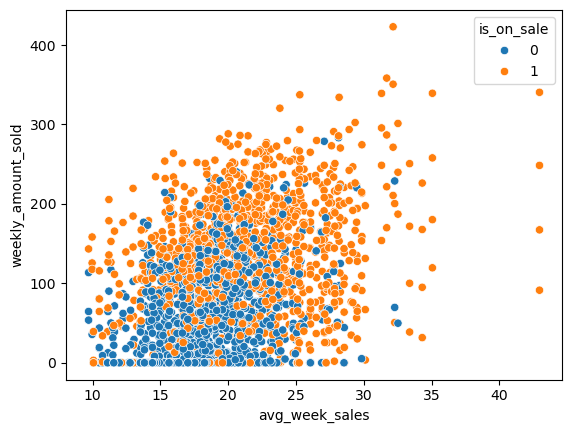

In [39]:
sns.scatterplot(x='avg_week_sales',y='weekly_amount_sold',hue = 'is_on_sale',data=data)

 해당 scatterplot을 살펴봤을 때, 가격을 할인한 회사가 더 큰 규모의 회사임을 의미한다. 즉, 할인한 회사와 할인하지 않은 회사 간에는 균형이 맞지 않는다. 이 그래프는 앞서 제시한 가설 $E[Y_0|T=1] \gt E[Y_0|T=0]$ 이 맞다는 강력한 증거이다. 가격을 할인한 $(T=1)$ 회사 수와 할인하지 않았을 때의 해당 회사의 결과 $(Y_0)$가 모두 회사의 규모에 따라 증가하므로 상향 편향(upward bias)가 있다.  
 이 편향은 **심슨의 역설(Simpon's Paradox)** 의 덜 극단적인 버전과 같다. 심슨의 역설에서 두 변수간의 관계는 처음에 양의 관계이지만, 다른 세 번째 변수를 보정하면 음의 관계가 된다. 해당 예시에서는 편향이 상관관계의 방향을 뒤집을 정도로 극단적이진 않다.

다음 그림은 가격할인과 판매량 간의 상관관계가 너무 높아서 세 번째 변수인 회사 규모를 통제하면 해당 상관관계의 크기가 줄어드는 상황이다. 같은 규모의 회사를 보면, 가격할인과 판매량 간의 관계는 감소하지만, 여전히 양의 상관관계를 유지한다.

<center>

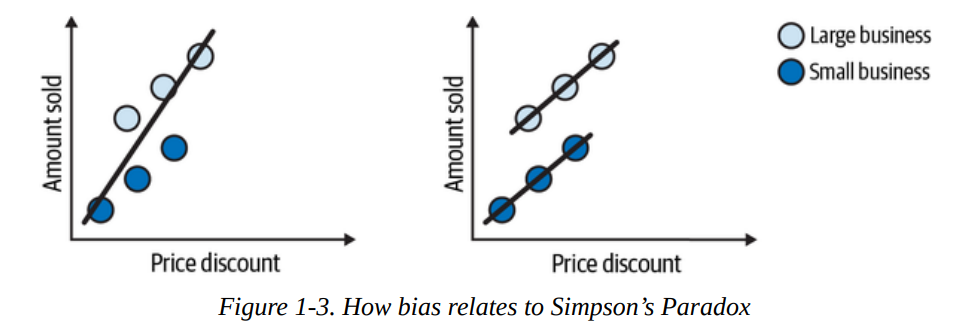

</center>

회사의 규모를 나타내는 변수가 있다고 가정했을 때, 회사 규모에 따른 판매량을 그려보면 규모가 클수록 더 많이 판매하는 증가 추세를 확인할 수 있다. 할인한 회사와 그렇지 않은 회사의 평균 판매량을 단순히 비교하면 다음과 같은 결과를 얻을 수 있다.

<center>

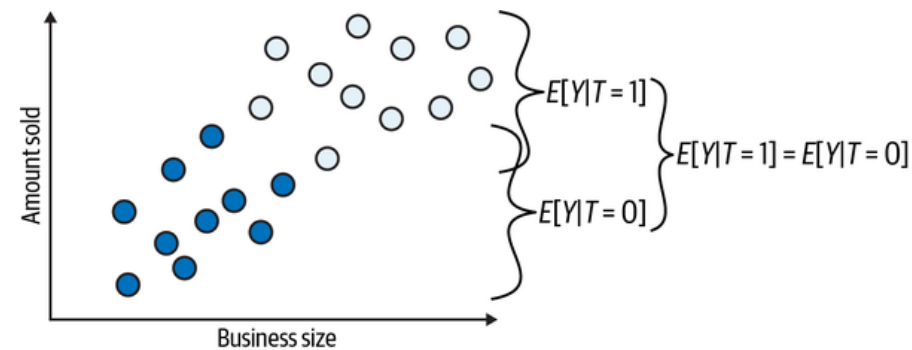

</center>

두 그룹 간의 판매량 차이에는 두 가지 원인이 있다.
- 처치효과 : 가격할인에 따른 판매량 증가
- 회사 규모 : 규모가 큰 기업일수록 더 많이 판매하고 할인할 수 있다.

인과추론의 까다로운 부분은 두 가지 원인을 모두 파악해야 한다는 것이다. 두 가지 잠재적 결과 모두 다음과 같은 그림에 추가했을 때의 결과와 비교해서 본다.(반사실적 결과는 삼각형으로 표시)  
개별 처치효과는 실험 대상의 결과와 동일 대상이 다른 처치을 받았을 때 얻을 수 있는 이론적 결과의 차이이다. 그리고 추정하려는 평균 처치효과는 개별 대상의 잠재적 결과 차이 $Y_1-Y_0$의 평균이다. 이러한 개별 대상의 차이는 이전 그래프에서 봤던 처치 받은 그룹과 받지 않은 그룹 간의 차이보다 훨씬 작다. 이는 오른쪽 그래프에 표시된 편향 때문이다.

<center>

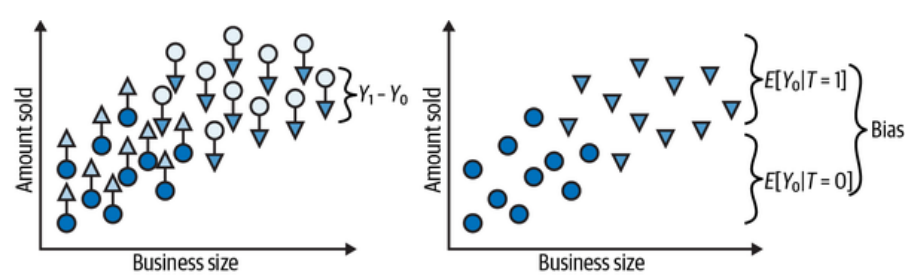

</center>

모든 실험 대상이 처치 받지 않도록 설정하여 편향을 나타낼 수도 있다. 이렇게 설정하면 잠재적 결과 $Y_0$만 남게 된다. 그 다음, 처치가 없는 상태에서 실험군과 대조군의 잠재적 결과가 서로 어떻게 다른지 확인할 수 있다.
만약 차이가 있다면, 처치 이외의 다른 요인 때문에 실험군과 대조군의 차이가 생긴다. 따라서 앞서 설명했듯이, 편향은 진정한 처치효과를 파악하기 어렵게 만든다.

---

## 1.6 인과효과 식별

**식별**은 모든 인과추론 분석의 첫 단계이다. **식별은 인과추론에서 편향을 해결하는 방법**이다. 우리는 하나의 잠재적 결과를 관측할 수 있으므로, 인과 추정량을 관측할 수 없다. 즉, $E[Y_1-Y_0]$와 같은 인과 추정량을 직접 추정할 수 없다. 하지만 관측 가능한 다른 수치를 찾아서 이를 관심 있는 인과 추정량을 찾는 데 활용할 수 있다. **관측 가능한 데이터에서 인과 추정량을 찾아내는 방법**이 식별 과정이다.

예를 들어 만약 $E[Y|T=t]$가 $E[Y_t]$와 같아지는 데 성공했다면($E[Y_t]$를 식별했다면), 단순히 $E[Y|T=1]-E[Y|T=0]$을 추정하여 $E[Y_1-Y_0]$를 구할 수 있다. 즉, 관측된 값인 실험군과 대조군의 평균 결과를 추정하여 관심있는 인과 추정량을 구할 수 있다.

**인과적 식별은 편향을 없애는 과정**으로도 볼 수 있다. 이는 잠재적 결과를 사용하여 상관관계를 인과관계와 동일하게 만드는 데 무엇이 필요한지 설명할 수 있다. 만약 $E[Y_0|T=0]=E[Y_0|T=1]$이라면 **상관관계는 인과관계가 된다.** $E[Y_0|T=0]=E[Y_0|T=1]$의 의미는 처치와 관계없이 대조군과 실험군이 **비교 가능(comparison)** 함을 의미한다. 수식으로 살펴보면 편향은 사라지고 실험군의 효과만 남게 돤다.


$$
E[Y|T=1] - E[Y|T=0] = E[Y_1-Y_0|T=1] = ATT
$$

또한, 실험군과 대조군이 처치에 유사하게 반응하면(즉, $E[Y_1-Y_0|T=1]=E[Y_1-Y_0|T=0]\ $이면) **평균의 차이가 평균 인과효과가 된다.**

$$
E[Y|T=1]-E[Y|T=0] = ATT = ATE = E[Y_1-Y_0]
$$

**실험군와 대조군이 서로 교환가능하다면 데이터에서 관측할 수 있는 수치로 인과관계를 표현하는 일이 매우 간단해진다.** 가격할인 예시에 이를 적용해본다. 가격을 할인한 회사와 그렇지 않은 회사가 서로 비슷하다면(즉, 교환가능하다면,해당 예시에서는 기업의 규모), 두 그룹 간의 판매량 차이는 전적으로 가격할인 때문이라고 볼 수 있다.

### 독립성 가정
교환 가능성은 인과추론의 핵심 가정이다. 이 가정은 매우 중요하며, 전문가마다 가정을 설명하는 방법이 다양하다. 일반적인 방법의 하나인 **독립성 가정(Independence Assumption)** 부터 설명한다. 여기서는 $(Y_0,Y_1)\bot T$와 같이 잠재적 결과가 처치와 독립적이라고 가정한다. 독립성 가정은 수학적으로 $E[Y_0|T] = E[Y_0]$로 표현할 수 있게 해주며, 이는 처치가 잠재적 결과에 관한 어떠한 정보도 제공하지 않음을 의미한다. 어떤 실험 대상이 처치 받았다고 해서 처치 받지 않은 경우 ($Y_0$)의 결과가 더 낮거나 더 높음을 의미하지 않으며 $E[Y_0|T=0]=E[Y_0|T=1]$의 또 다른 표현일 뿐이다.  
가격할인 예시에서는 단순히 모든 회사가 할인하지 않았다면 할인하기로 한 회사와 그렇지 않은 회사를 구분할 수 없다는 것과 같다. 처치가 결과에 미치는 효과와 처치를 제외하면 서로 비슷할 것이다. 마찬가지로, $E[Y_1|T=1]=E[Y_1]$은 모든 회사가 할인했더라도 두 그룹을 구분할 수 없음을 나타낸다. 요약하자면, **처치 여부에 관계 없이 실험군과 대조군 모두 서로 비교 가능하고 구별할 수 없다는 뜻이다.**

### 랜덤화와 식별
독립성 가정으로 상관관계를 인과관계와 같게 만들어야 한다. 인과추론 문제는 보통 다음과 같이 두 단계로 나뉜다.  
- **식별(Identification)** : 관측 가능한 데이터로 인과 추정량을 표현하는 방법을 알아내는 단계
- **추청(Estimation)** : 실제로 데이터를 사용하여 앞서 식별한 인과 추정량을 추정하는 단계

처치를 무작위(randomize), 즉 랜덤하게 배정할 수 있다고 가정해보자. 앞선 예시의 온라인 플랫폼 기업에 입점한 회사들은 자율적으로 가격 책정을 할 수 있다. 하지만, 무작위로 처치($IsOnSales$)를 배정하는 방법을 찾을 수 있다. 예를 들면, 입점 회사들에 가격할인을 하도록 명령하는 권한을 협상하면서 할인으로 발생한 가격의 차액은 플랫폼에서 지불한다고 가정해본다. 이제 무작위로 가격할인 여부를 정할 수 있는 권한이 생겼다.  
먼저 랜덤화(Randomization)은 동전 던지기로 실험 대상에 처치를 배정하는 것과 같다. 여기서 발생한 처치 배정의 변화는 인과 메커니즘의 다른 요인들과는 완전히 무관하다.

$$
IsOnSales ← rand(t)
$$
$$
AmountSold ← f_y(IsOnSales,u_y)
$$

랜덤화에서는 처치 배정 메커니즘이 완전히 알려져있으므로 앞의 인과모델에서 외부변수 $u_t$가 사라진다. 게다가 실험 대상에 처치가 무작위로 이루어지므로 잠재적 결과는 물론이고 어떤 변수와도 독립이 된다. 랜덤화는 독립성 가정을 거의 강제적으로 만족하게 만든다.

다음 그림의 왼쪽 그래프는 아직 실현되지 않은 잠재적 결과(삼각형)를 보여준다. 여기서 오른쪽 그래프와 같이 랜덤화 과정을 통해 처치는 두 가지 잠재적 결과 중 하나를 실현하게 된다.

<center>

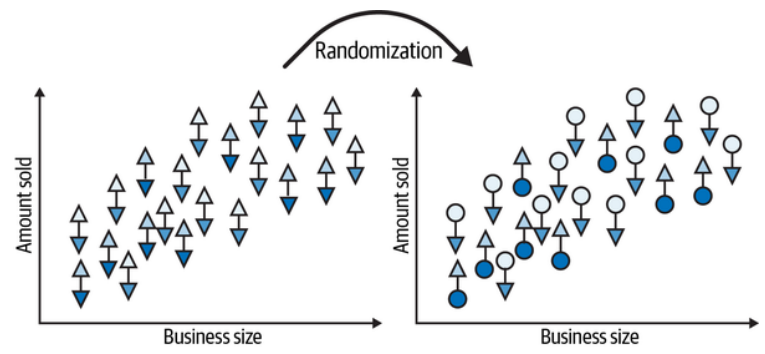

</center>

<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 무작위 VS 관측</strong><br>
    인과추론에서 <b>무작위(randomize)</b>라는 용어는 처치가 랜덤으로 이루어졌거나 처치 배정 매커니즘이 완전히 알려져 있고 비결정적(Non-Deterministic) 데이터에 관해 애기할 때 주로 사용된다. 이와 대조적으로 <b>관측(Observational)</b>이라는 용어는 누가 어떤 처치를 받았는지는 알 수 있지만, 처치가 어떻게 배정되었는지는 알 수 없는 데이터를 설명하는데 사용된다.
    <br>
</div>

다음으로, 실현되지 않은 잠재적 결과(삼각형)을 제거하여 군더더기를 제거해본다. 이제 실험군과 대조군을 비교할 수 있다.

<center>

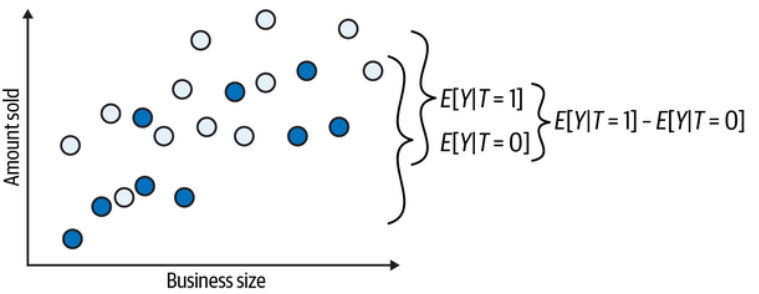

</center>

여기서 실험군과 대조군의 결과 차이는 **평균 인과효과**라고 볼 수 있다. 처치 이외에 다른 차이를 발생시키는 요인이 없기 때문이다. 따라서 관측되는 모든 차이는 처치 때문에 발생하며, 편향이 없음을 의미한다. 모든 대상이 처치 받지 않도록 설정하여 $Y_0$만 관측할 수 있다면, 실험군과 대조군 간의 차이를 발견할 수 없다.

<center>

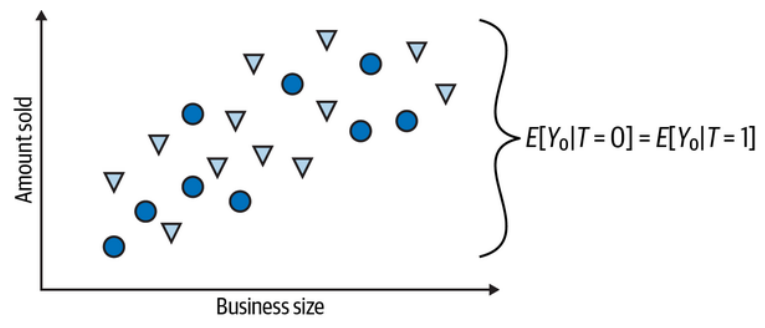

</center>

이것이 바로 어렵고 까다로운 인과적 식별 작업의 핵심이다. 인과적 식별은 편향을 제거하고 실험군과 대조군을 비교할 수 있게 만드는 방법을 찾아내어 눈에 보이는 모든 차이를 처치에 따른 효과로 돌리도록 하는 과정이다. 여기서 **식별은 데이터 생성 과정을 알거나 가정할 수 있는 경우에만 가능하다는 점이 중요하다.** 즉, 일반적으로 처치가 어떻게 배정되었는지를 알 수 있을 때 식별이 가능하다. 앞서 데이터만으로는 인과적 질문에 답할 수 없다고 말한 이유가 여기에 있다. 물론 데이터 자체도 인과효과 추정에 매우 중요하지만, 데이터(특히 처치)가 어떻게 이루어졌는지에 대한 설명도 중요하다. 도메인 지식을 활용하거나 개입을 해서 처치에 영향을 미치고 그에 따라 결과가 어떻게 변하는지를 관측함으로써 비로소 인과추론이 이루어지는 것이다.

---

## 1장 요약

이 장에서 인과추론에서 사용할 수학적 표기를 배웠다. 그리고 해당 실험 대상이 특정 처치 $T=t$를 받았을 때 관측할 수 있는 결과라는 잠재적 결과의 정의를 배웠다.
$$
Y_{ti}=Y_i|do(T_i=t)
$$

잠재적 결과는 상관관계가 인과관계와 다른 이유를 이해하는 데 매우 유용한 개념이다. 즉, 실험군과 대조군이 처치 이외의 다른 이유 때문에 서로 다르다면 ($E[Y_0|T=1] \neq E[Y_0|T=0]$), 두 그룹간의 비교 시 실제 인과효과가 아닌 편향된 추정값이 산출된다. 또한 잠재적 결과 프레임워크를 사용하여 연관관계가 인과관계와 같아지려면 필요한 조건이 무엇인지 배웠다.

$$
(Y_0,Y_1)\bot T
$$

다음과 같이 실험군과 대조군이 교환(비교) 가능하거나 처치를 무작위로 배정한 경우에는 실험군과 대조군의 결과를 단신 비교하면 처치효과를 얻을 수 있다.
$$
E[Y_1-Y_0]=E[Y|T=1]-E[Y|T=0]
$$

또한 인과추론을 적용할 때 필요한 몇 가지 주요 가정을 파악했다. 예를 들어, 처치효과 추정 시 편향을 배제하려고 처치 배정과 잠재적 결과 사이에 독립성 $T \bot Y_t$ 이 있다고 가정한다.

또한 결과 $Y$를 다음 식처럼 잠재적 결과 간의 전환 함수(Switch function)로 정의할 때, 한 실험 대상의 처치가 다른 대상의 결과에 영향을 미치지 않아야 하며(STUVA) 모든 처치의 종류가 고려되었다고 가정했다.(일치성 가정, $T_i=t$일 때 $Y_i(t)=Y$)  
$$
Y_i=(1-T_i)Y_{0i}+T_iY_{1i}
$$

일반적으로 인과추론에는 항상 가정이 필요하다는 것을 늘 염두에 두어야 한다. 가지고 있는 통계적 추정량을 바탕으로 알고 싶은 인과 추정량을 구하려면 가정이 필수적이다.